In [1]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import chardet

# Fungsi untuk membaca file teks abstrak dengan mendeteksi encoding yang benar
def read_abstract(file_path):
    # Membaca file dalam mode 'rb' untuk mendeteksi encoding secara akurat
    with open(file_path, 'rb') as file:
        raw_data = file.read()
    detected = chardet.detect(raw_data)  # Mendeteksi encoding menggunakan chardet
    encoding = detected['encoding']  # Mengambil encoding yang terdeteksi

    # Membuka file kembali dengan encoding yang tepat dan mengembalikan teks abstrak
    with open(file_path, 'r', encoding=encoding) as file:
        return file.read().strip()  # Menghapus spasi ekstra atau baris kosong di awal/akhir

# Fungsi untuk mencetak hasil cosine similarity antara semua pasangan abstrak
def print_similarity_results(abstracts, cosine_sim):
    print("\nSimilarity Results:")
    print("-" * 50)
    # Melakukan perulangan untuk setiap pasangan dokumen abstrak
    for i in range(len(abstracts)):
        for j in range(i+1, len(abstracts)):  # Membandingkan abstrak ke-i dengan ke-j
            similarity = cosine_sim[i][j]  # Mengambil nilai similarity dari matrix
            print(f"Abstract {i+1} and Abstract {j+1}:")
            print(f"  Similarity: {similarity:.2%}")  # Menampilkan hasil similarity dalam persentase
            # Memberikan interpretasi berdasarkan nilai similarity
            if similarity > 0.7:
                print("  Interpretation: High similarity")
            elif similarity > 0.4:
                print("  Interpretation: Moderate similarity")
            else:
                print("  Interpretation: Low similarity")
            print()

# Daftar file path untuk abstrak yang akan diproses
abstract_files = [
    "abstrak1.txt",
    "abstrak2.txt",
    "abstrak3.txt",
    "abstrak4.txt"
]

# Membaca abstrak dari file dan menyimpan dalam list
abstracts = []
for file in abstract_files:
    try:
        # Membaca setiap abstrak dan menambahkannya ke list abstracts
        abstract = read_abstract(file)
        abstracts.append(abstract)
        print(f"Successfully read: {file}")
    except Exception as e:
        # Menangani error jika terjadi masalah dalam membaca file
        print(f"Error reading {file}: {str(e)}")

# Membuat vectorizer TF-IDF untuk mengubah teks abstrak menjadi matriks TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(abstracts)  # Melakukan fitting dan transformasi abstrak ke TF-IDF
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)  # Menghitung cosine similarity antar vektor TF-IDF

# Mencetak hasil similarity berdasarkan nilai cosine similarity
print_similarity_results(abstracts, cosine_sim)

Successfully read: abstrak1.txt
Successfully read: abstrak2.txt
Successfully read: abstrak3.txt
Successfully read: abstrak4.txt

Similarity Results:
--------------------------------------------------
Abstract 1 and Abstract 2:
  Similarity: 33.93%
  Interpretation: Low similarity

Abstract 1 and Abstract 3:
  Similarity: 27.59%
  Interpretation: Low similarity

Abstract 1 and Abstract 4:
  Similarity: 39.36%
  Interpretation: Low similarity

Abstract 2 and Abstract 3:
  Similarity: 26.16%
  Interpretation: Low similarity

Abstract 2 and Abstract 4:
  Similarity: 34.02%
  Interpretation: Low similarity

Abstract 3 and Abstract 4:
  Similarity: 31.69%
  Interpretation: Low similarity



In [2]:
from collections import Counter
import string

# Fungsi untuk parsing dokumen dan menghitung frekuensi kata (terms)
def parse_documents(abstracts):
    all_terms = []
    term_frequency = Counter()  # Menyimpan frekuensi seluruh terms

    for abstract in abstracts:
        # Menghapus tanda baca dan memecah dokumen menjadi kata-kata (tokenisasi)
        tokens = abstract.translate(str.maketrans('', '', string.punctuation)).lower().split()
        all_terms.extend(tokens)
        term_frequency.update(tokens)  # Mengupdate frekuensi kata dalam seluruh dokumen

    return term_frequency

# File paths for the abstracts
abstract_files = [
    "abstrak1.txt",
    "abstrak2.txt",
    "abstrak3.txt",
    "abstrak4.txt"
]

# Membaca file abstrak
abstracts = []
for file in abstract_files:
    try:
        abstract = read_abstract(file)
        abstracts.append(abstract)
        print(f"Successfully read: {file}")
    except Exception as e:
        print(f"Error reading {file}: {str(e)}")

# Parsing dokumen dan menghitung frekuensi terms
term_frequency = parse_documents(abstracts)

# Mengurutkan terms berdasarkan frekuensi kemunculannya
sorted_term_frequency = term_frequency.most_common()

# Menampilkan terms dan frekuensi kemunculannya yang diurutkan
print("\nTerm Frequencies across all documents (sorted):")
print("-" * 50)
for term, freq in sorted_term_frequency:
    print(f"{term}: {freq}")

Successfully read: abstrak1.txt
Successfully read: abstrak2.txt
Successfully read: abstrak3.txt
Successfully read: abstrak4.txt

Term Frequencies across all documents (sorted):
--------------------------------------------------
the: 56
of: 35
to: 18
is: 15
in: 15
and: 14
data: 12
a: 11
that: 10
for: 10
with: 9
followers: 8
this: 7
account: 6
used: 6
or: 5
by: 5
on: 5
are: 5
documents: 5
customer: 5
kmeans: 5
claim: 5
can: 4
into: 4
from: 4
results: 4
were: 4
cases: 4
based: 4
algorithm: 4
pca: 4
bpjs: 4
promotion: 3
information: 3
accounts: 3
follower: 3
be: 3
determine: 3
using: 3
social: 3
an: 3
grouping: 3
cluster: 3
groups: 3
analysis: 3
interaction: 3
out: 3
their: 3
various: 3
similar: 3
score: 3
model: 3
process: 3
research: 3
clustering: 3
which: 3
optimal: 3
kesehatan: 3
dissemination: 2
usually: 2
done: 2
has: 2
because: 2
it: 2
ayutingting92: 2
infounjaya: 2
two: 2
number: 2
likes: 2
comments: 2
only: 2
actively: 2
involved: 2
passive: 2
did: 2
not: 2
children: 2
future: 2
l

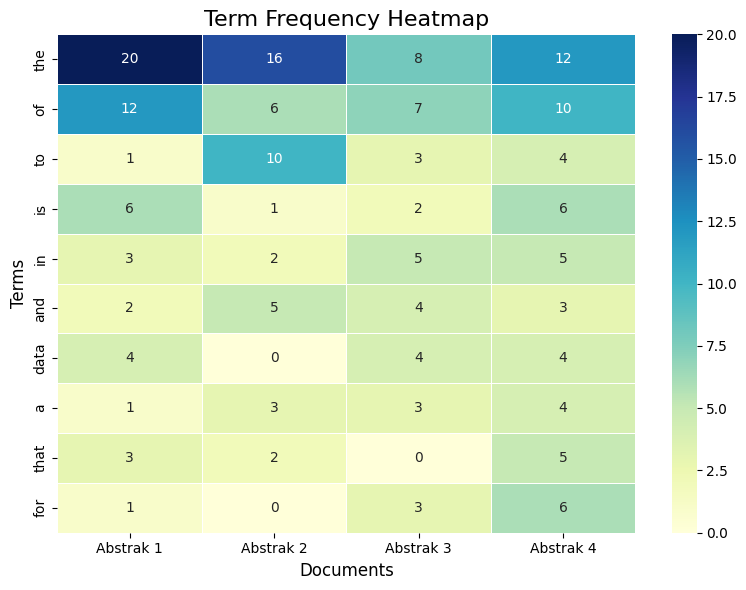

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Membuat matriks term frequency per dokumen
def term_frequency_matrix(terms, abstracts):
    matrix = []
    for abstract in abstracts:
        # Tokenisasi dan pembersihan dokumen
        tokens = abstract.translate(str.maketrans('', '', string.punctuation)).lower().split()
        # Hitung frekuensi setiap term untuk dokumen ini
        term_counts = Counter(tokens)
        matrix.append([term_counts.get(term, 0) for term in terms])

    return np.array(matrix)

# Mengambil top N terms untuk visualisasi
top_n_terms = [term for term, freq in term_frequency.most_common(10)]

# Membuat matriks term frequency untuk top N terms
matrix = term_frequency_matrix(top_n_terms, abstracts)

# Membuat DataFrame untuk heatmap
df = pd.DataFrame(matrix.T, index=top_n_terms, columns=[f'Abstrak {i+1}' for i in range(len(abstracts))])

# Membuat visualisasi heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df, annot=True, cmap="YlGnBu", cbar=True, linewidths=.5)
plt.title("Term Frequency Heatmap", fontsize=16)
plt.xlabel("Documents", fontsize=12)
plt.ylabel("Terms", fontsize=12)
plt.tight_layout()
plt.show()

<ipython-input-4-f1482447665c>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequencies, y=terms, palette="viridis")


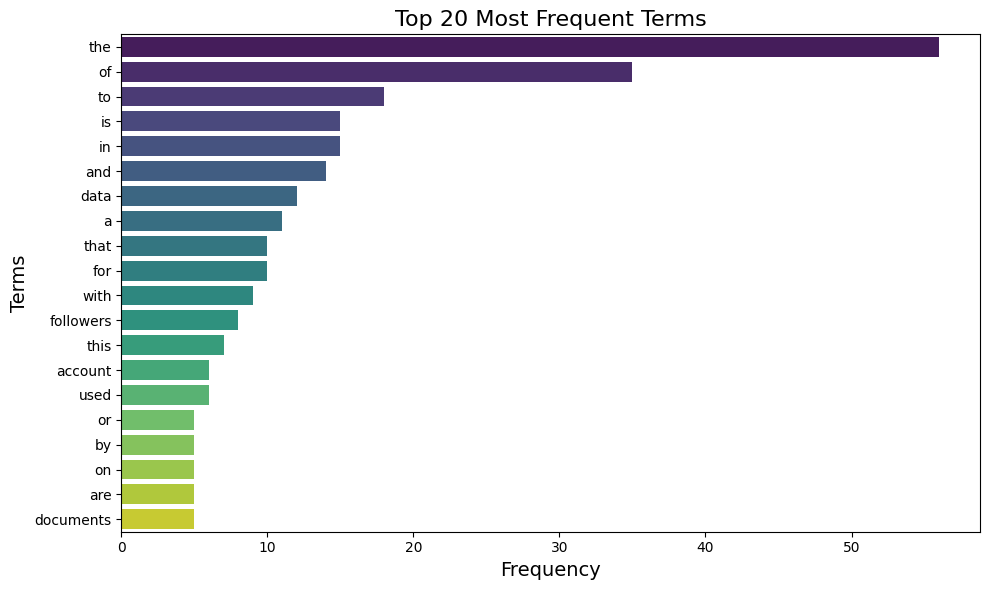

In [4]:
# Membuat plot visualisasi term frequency
def plot_term_frequency(term_frequency, top_n=20):
    # Mengambil top_n terms yang paling sering muncul
    most_common_terms = term_frequency.most_common(top_n)
    terms, frequencies = zip(*most_common_terms)

    # Membuat plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=frequencies, y=terms, palette="viridis")

    plt.title(f'Top {top_n} Most Frequent Terms', fontsize=16)
    plt.xlabel('Frequency', fontsize=14)
    plt.ylabel('Terms', fontsize=14)
    plt.tight_layout()
    plt.show()

# Mengurutkan terms dan frekuensi kemunculannya
sorted_term_frequency = term_frequency.most_common()

# Menampilkan plot untuk top 20 terms
plot_term_frequency(term_frequency, top_n=20)